# Dataset Summary and Objective

## 1. Dataset Fields:
- **Name:** Patient's name (can be anonymized or excluded for modeling).
- **Age:** Patient's age.
- **Gender:** Patient's gender (male/female).
- **Blood Type:** Patient's blood type (e.g., A, B, AB, O).
- **Medical Condition:** Patient's medical issue (e.g., cancer, obesity, diabetes).
- **Date of Admission:** The date the patient was admitted to the hospital.
- **Doctor:** The attending doctor.
- **Hospital:** Hospital information.
- **Insurance Provider:** Patient's insurance company.
- **Billing Amount:** Total hospital expenses.
- **Room Number:** Hospital room number.
- **Admission Type:** Type of hospital admission (e.g., urgent, elective).
- **Discharge Date:** The date the patient was discharged.
- **Medication:** Prescribed medication.
- **Test Results:** Health test results (Normal, Inconclusive, Abnormal).

## 2. Project Objective:
- Build a classification model to predict test results (Normal, Inconclusive, Abnormal).
- Prioritize critical health cases by predicting health conditions early.
- Analyze the impact of insurance costs, medication, and admission type on test results.

## 3. Machine Learning Methods to Apply:
- **Logistic Regression:** A simple and explainable classification model.
- **Decision Trees:** To identify the most important features.
- **Support Vector Machines (SVM):** For learning complex classification boundaries.

## 4. Expected Outcomes:
- Develop a classification model to predict critical health conditions effectively.
- Improve the accuracy of test result predictions to support clinical decision-making.
- Provide insights to optimize medical costs and enhance healthcare outcomes.


# Libraries

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


# Data Import

In [119]:
dataset = pd.read_csv("../Datasets/healthcare_dataset.csv")
dataset.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


# Data Preprocessing

## Basic Stats to Understand Data

In [120]:
dataset.shape

(55500, 15)

In [121]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

* Necessary steps to do:
    - Name column has to be prepared properly
    - Data of Admission & Discharge Date has to be converted to the Date Time type.

In [122]:
dataset.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


### Name Column trasformation

In [123]:
def normalize_name(name):
    return ' '.join(word.capitalize() for word in name.split())

dataset['Name'] = dataset['Name'].apply(normalize_name)

# Check
dataset['Name'].head()

0    Bobby Jackson
1     Leslie Terry
2      Danny Smith
3     Andrew Watts
4    Adrienne Bell
Name: Name, dtype: object

### Type conversetion of Date related columns

In [124]:
dataset['Date of Admission'] = pd.to_datetime(dataset['Date of Admission'])
dataset['Discharge Date'] = pd.to_datetime(dataset['Discharge Date'])

#Check
for i in [dataset['Discharge Date'], dataset['Date of Admission']]:
    i.info()

<class 'pandas.core.series.Series'>
RangeIndex: 55500 entries, 0 to 55499
Series name: Discharge Date
Non-Null Count  Dtype         
--------------  -----         
55500 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 433.7 KB
<class 'pandas.core.series.Series'>
RangeIndex: 55500 entries, 0 to 55499
Series name: Date of Admission
Non-Null Count  Dtype         
--------------  -----         
55500 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 433.7 KB


## Missing Value Check

In [125]:
dataset.isna().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

* Clear, 😉

### Data Distribution Analysis

#### Age Feature

Text(0.5, 1.0, 'Age Distribution')

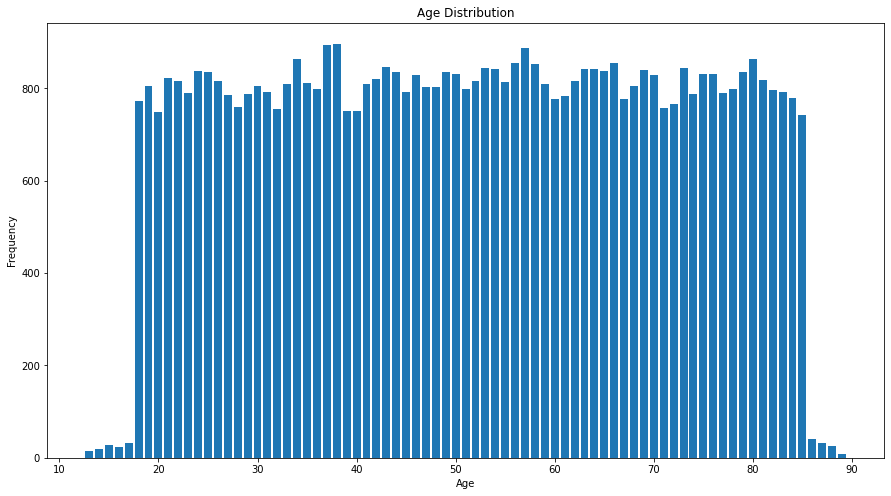

In [126]:
f, ax = plt.subplots(figsize=(15, 8))
ax.bar(x = dataset['Age'].value_counts().index, height = dataset['Age'].value_counts())
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')
ax.set_title("Age Distribution")

#### Gender Feature

Text(0.5, 1.0, 'Gender Distribution')

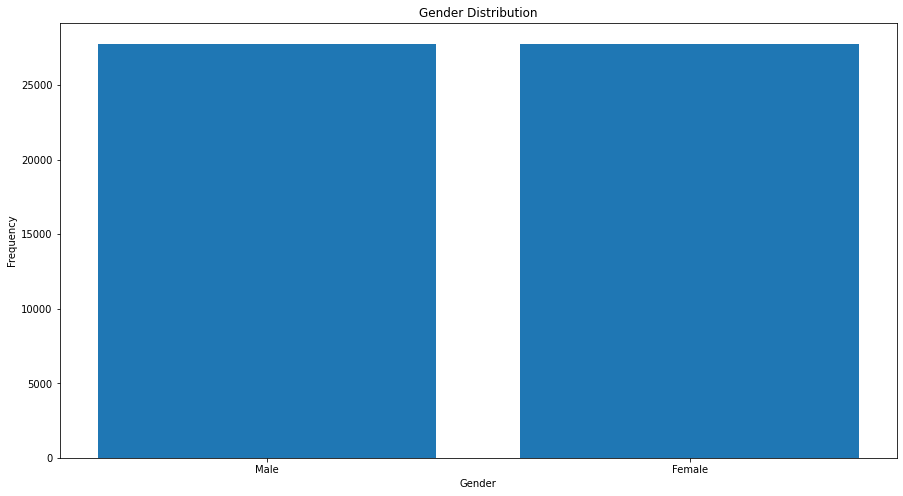

In [127]:
f, ax = plt.subplots(figsize=(15, 8))
ax.bar(x = dataset['Gender'].value_counts().index, height = dataset['Gender'].value_counts())
ax.set_xlabel('Gender')
ax.set_ylabel('Frequency')
ax.set_title("Gender Distribution")

#### Blood Type

Text(0.5, 1.0, 'Blood Type Distribution')

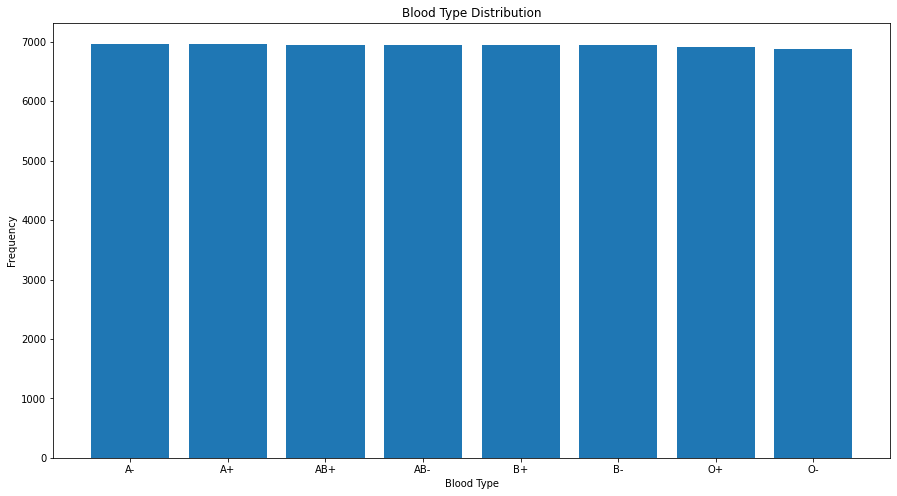

In [128]:
f, ax = plt.subplots(figsize=(15, 8))
ax.bar(x = dataset['Blood Type'].value_counts().index, height = dataset['Blood Type'].value_counts())
ax.set_xlabel('Blood Type')
ax.set_ylabel('Frequency')
ax.set_title("Blood Type Distribution")

#### Medical Condition

Text(0.5, 1.0, 'Medical Condition Distribution')

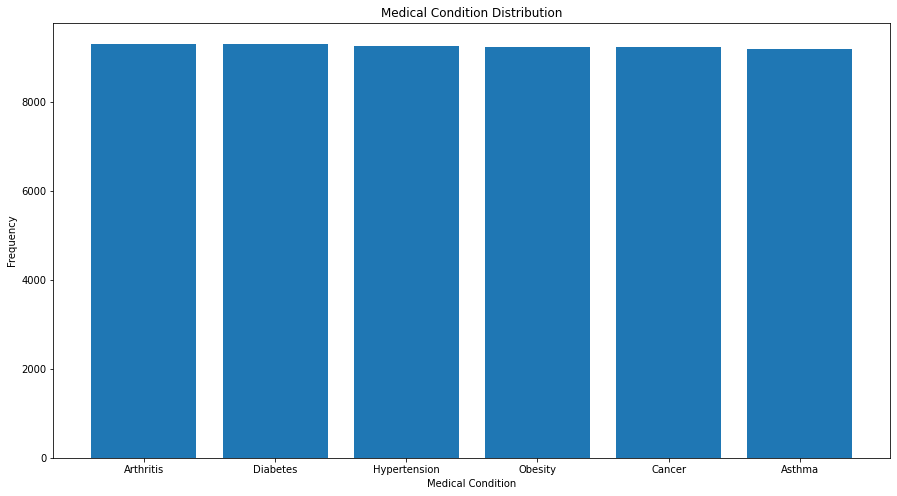

In [129]:
f, ax = plt.subplots(figsize=(15, 8))
ax.bar(x = dataset['Medical Condition'].value_counts().index, height = dataset['Medical Condition'].value_counts())
ax.set_xlabel('Medical Condition')
ax.set_ylabel('Frequency')
ax.set_title("Medical Condition Distribution")

#### Doctor Feature

In [130]:
len(dataset['Doctor'].unique())

40341

#### Hostpital Feature

In [131]:
len(dataset['Hospital'].unique())

39876

#### Insurance Provider Feature

Text(0.5, 1.0, 'Insurance Provider Distribution')

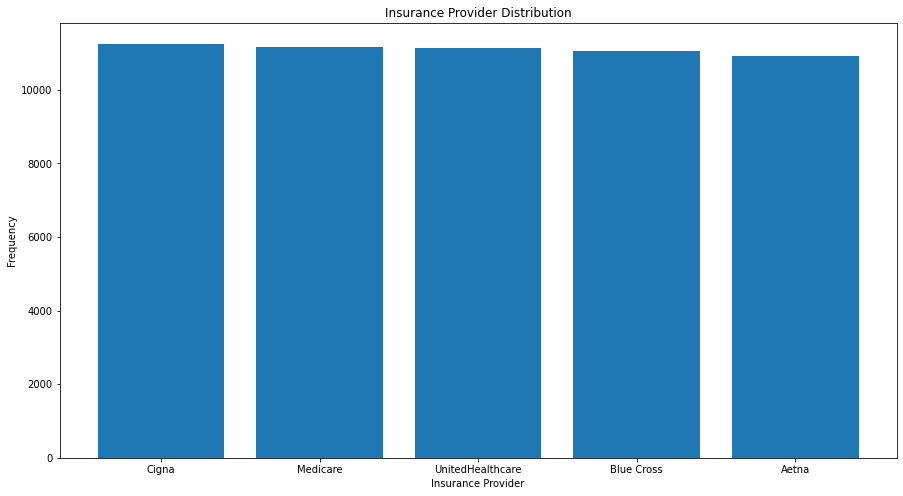

In [132]:
f, ax = plt.subplots(figsize=(15, 8))
ax.bar(x = dataset['Insurance Provider'].value_counts().index, height = dataset['Insurance Provider'].value_counts())
ax.set_xlabel('Insurance Provider')
ax.set_ylabel('Frequency')
ax.set_title("Insurance Provider Distribution")

#### Room Number Feature

In [133]:
len(dataset['Room Number'].unique())

400

#### Admission Type Feature

Text(0.5, 1.0, 'Admission Type Distribution')

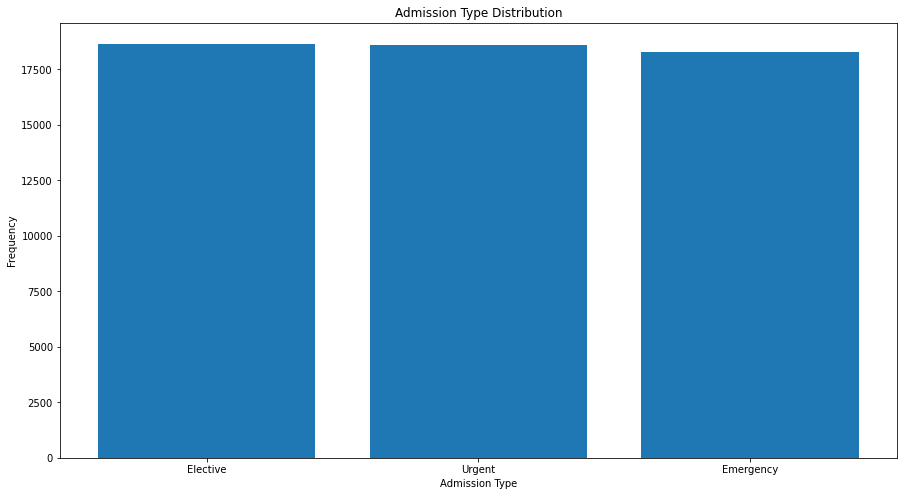

In [134]:
f, ax = plt.subplots(figsize=(15, 8))
ax.bar(x = dataset['Admission Type'].value_counts().index, height = dataset['Admission Type'].value_counts())
ax.set_xlabel('Admission Type')
ax.set_ylabel('Frequency')
ax.set_title("Admission Type Distribution")

#### Test Results Feature

Text(0.5, 1.0, 'Test Results Distribution')

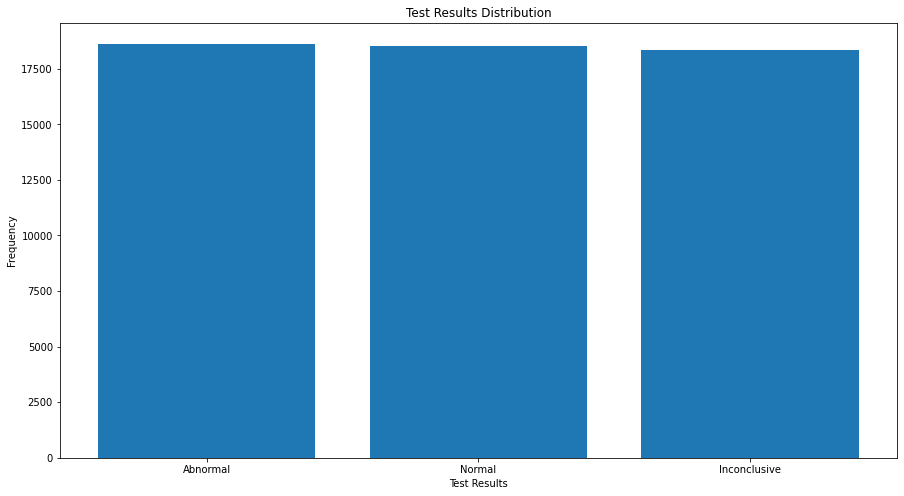

In [135]:
f, ax = plt.subplots(figsize=(15, 8))
ax.bar(x = dataset['Test Results'].value_counts().index, height = dataset['Test Results'].value_counts())
ax.set_xlabel('Test Results')
ax.set_ylabel('Frequency')
ax.set_title("Test Results Distribution")

#### Medication Feature

Text(0.5, 1.0, 'Medication Distribution')

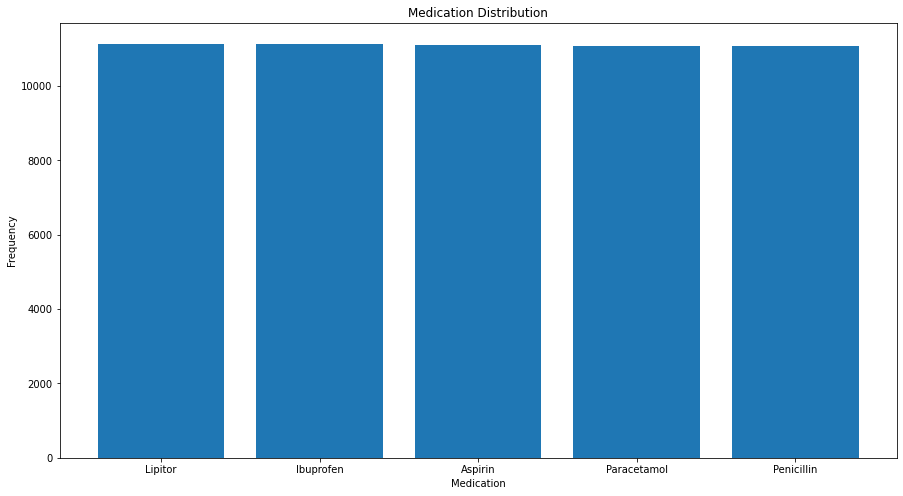

In [136]:
f, ax = plt.subplots(figsize=(15, 8))
ax.bar(x = dataset['Medication'].value_counts().index, height = dataset['Medication'].value_counts())
ax.set_xlabel('Medication')
ax.set_ylabel('Frequency')
ax.set_title("Medication Distribution")

Text(0.5, 1.0, 'Distribution of Test Results in each Age Group')

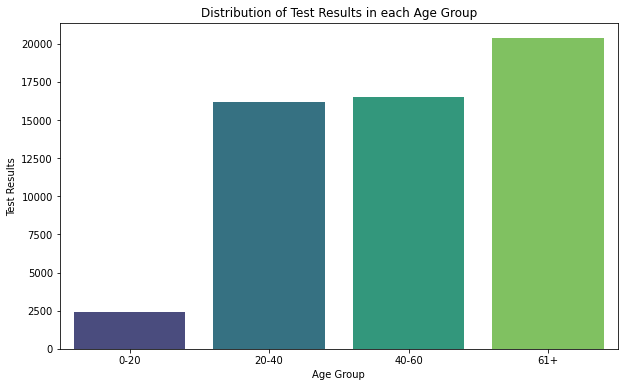

In [137]:
dataset['Age Group'] = pd.cut(dataset['Age'], bins=[0, 20, 40, 60, 100], labels=['0-20', '20-40', '40-60', '61+'])
df = dataset.groupby('Age Group')['Test Results'].agg('count')

f, ax = plt.subplots(figsize=(10, 6))
#ax.bar(x=df.index, height=df)
sns.barplot(x=df.index, y=df, ax=ax, palette='viridis')
ax.set_title("Distribution of Test Results in each Age Group")

- Hastalık Türlerine Göre Ortalama Masraf Analizi:

    Tıbbi durumlara göre ortalama masraf değerlerini hesaplayıp görselleştirin.

In [138]:
dataset.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results', 'Age Group'],
      dtype='object')

Text(0.5, 1.0, 'Average Expense Analysis by Medical Sondition Types')

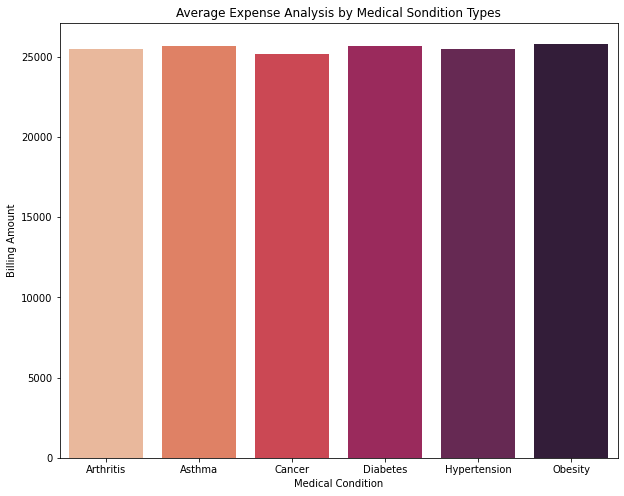

In [139]:
df = dataset.groupby('Medical Condition')['Billing Amount'].mean()

f, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x=df.index, y=df, ax=ax, palette='rocket_r')
ax.set_title("Average Expense Analysis by Medical Sondition Types")

- Aylık Hasta Kabul Analizi:

    Giriş tarihlerinden ay bilgisi çıkarılarak aylık hasta kabul yoğunluğunu analiz edin.

Text(0.5, 1.0, 'Number of Patient per Month')

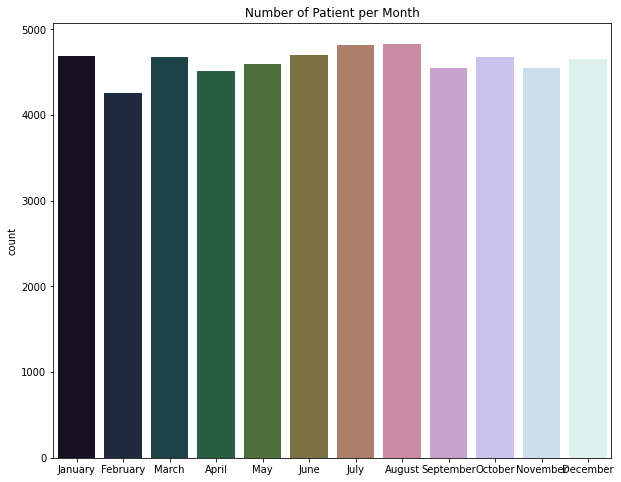

In [140]:
months=["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
dataset['Month']=pd.to_datetime(dataset['Date of Admission']).dt.month
monthly_counts = dataset['Month'].value_counts().sort_index()

f, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x=months, y=monthly_counts, ax=ax, palette='cubehelix')
ax.set_title("Number of Patient per Month")

- Sigorta Sağlayıcılarına Göre Billing Amount Dağılımı:

    Sigorta şirketlerine göre farklı Billing Amount dağılımını gruplandırın.

<Axes: xlabel='Insurance Provider', ylabel='Billing Amount'>

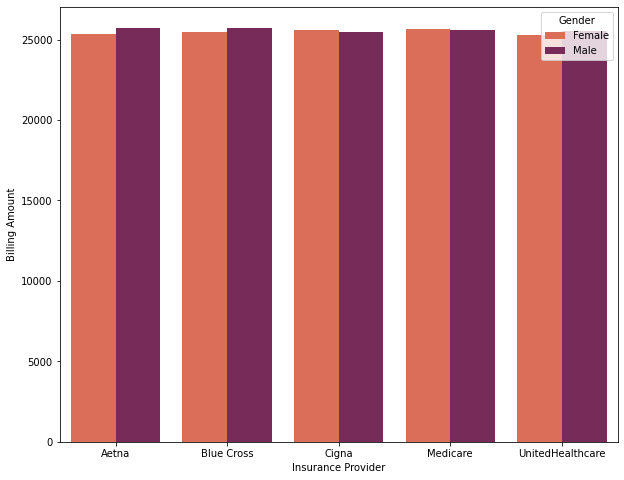

In [141]:
df = dataset.groupby(['Insurance Provider','Gender'])['Billing Amount'].agg('mean').to_frame().sort_index()

f, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x='Insurance Provider', y='Billing Amount', hue='Gender', data=df, ax=ax, palette="rocket_r")

- Kabul Türüne Göre Hastanede Kalış Süresi Analizi:

    Taburcu ve giriş tarihlerini kullanarak kalış süresini hesaplayın ve giriş türüne göre ortalamalarını karşılaştırın.

In [142]:
dataset.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results', 'Age Group', 'Month'],
      dtype='object')

Text(0.5, 1.0, 'Analysis of Length of Stay by Admission Type')

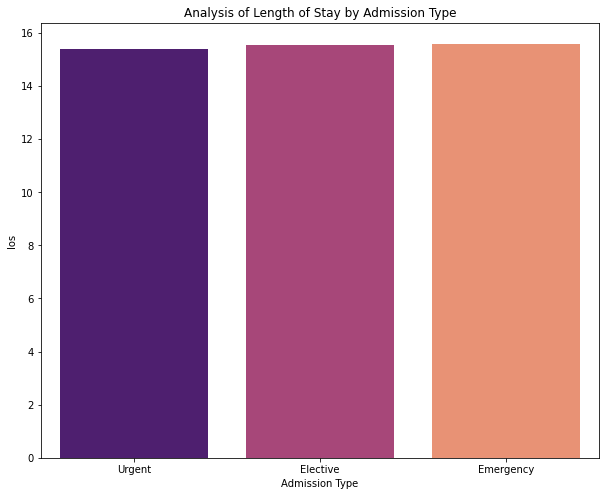

In [143]:
dataset['los'] = np.subtract(dataset['Discharge Date'], dataset['Date of Admission']).dt.days

df = dataset.groupby(['Admission Type'])['los'].agg('mean').sort_values().to_frame()

f, ax = plt.subplots(figsize=(10, 8))
sns.barplot(
    data=df,
    x='Admission Type',
    y='los',
    ax=ax,
    palette="magma"
)
ax.set_title("Analysis of Length of Stay by Admission Type")


- Korelasyon Analizi:

    Özellikler arasındaki korelasyonu analiz ederek anlamlı ilişkileri belirleyin.

In [144]:
dataset=dataset.drop(['Age Group', 'Month', 'los'], axis=1)

<Axes: >

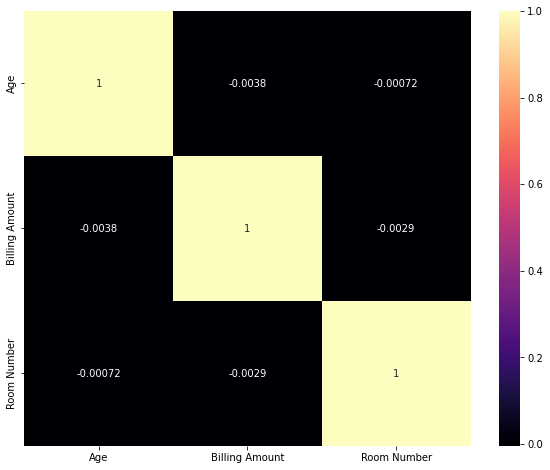

In [145]:
feature_corr = dataset.corr(numeric_only=True)

f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(data=feature_corr, annot=True, cmap="magma")

- Kan Gruplarına Göre Masraf Dağılımı:

    Kan gruplarına göre toplam veya ortalama masrafı analiz edin.

Text(0.5, 1.0, 'Analysis of Blood Type by Billing Amount')

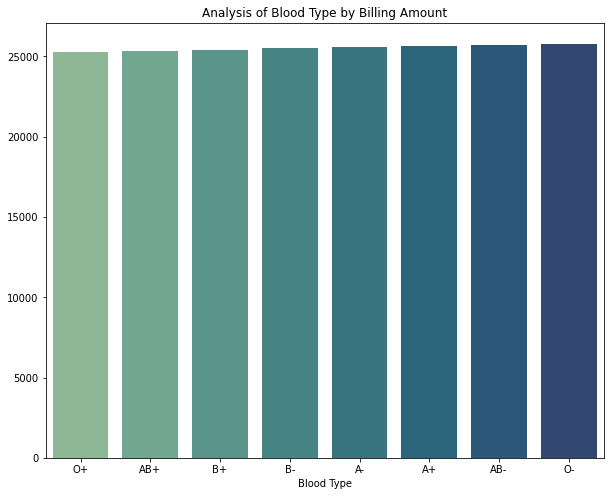

In [146]:
df = dataset.groupby(['Blood Type'])['Billing Amount'].agg('mean').sort_values(ascending=True)

f, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x=df.index, y=df.values, ax=ax, palette='crest')
ax.set_title("Analysis of Blood Type by Billing Amount")

* Billing Amount Accordig to the Blood Type per Gender

Text(0.5, 1.0, 'Billing Amount Accordig to the Blood Type per Gender')

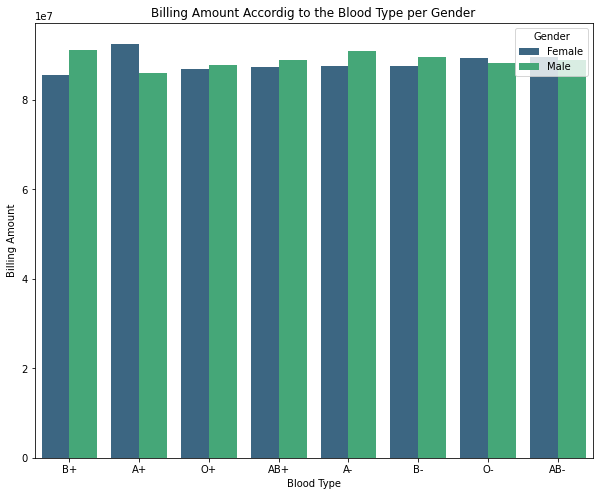

In [147]:
df = dataset.groupby(['Gender', 'Blood Type'])['Billing Amount'].agg('sum').sort_values(ascending=True).to_frame()

f, ax = plt.subplots(figsize=(10, 8))
sns.barplot(data=df, x='Blood Type', y='Billing Amount', hue='Gender', ax=ax, palette='viridis')
ax.set_title("Billing Amount Accordig to the Blood Type per Gender")

# Feature Engineering

* Creating a new field `Admission Duration`:
    - Instead of entrance and exit dates of patient, we can calculate Admissin Duration depending on these dates. After with that calculation, we will not need for `Date Of Admission`, `Discharge Date`, `Name`, `Doctor`, `Hospital` columns so, we can drop them. With this operation we can reduce operation cost.

In [148]:
dataset['Admission Duration'] = (dataset['Discharge Date'] - dataset['Date of Admission']).dt.days
dataset.drop(['Name', 'Doctor', 'Date of Admission', 'Discharge Date', 'Hospital'], axis=1, inplace=True)

* Next we need to also convert categorical features into numerical.

In [149]:
dataset['Gender'] = [
    1 if x=='Male' else 0 if x=='Female' else '' for x in dataset['Gender']]
dataset['Test Results'] = dataset['Test Results'].map({'Normal': 0, 'Abnormal': 1, 'Inconclusive': 2})

In [150]:
dataset = pd.get_dummies(
    dataset, 
    columns=[
        'Medication',
        'Blood Type',
        'Admission Type',
        'Medical Condition',
        'Insurance Provider'
    ],
    drop_first=True
)

In [151]:
dataset.head()

,Age,Gender,Billing Amount,Room Number,Test Results,Admission Duration,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin,...,Admission Type_Urgent,Medical Condition_Asthma,Medical Condition_Cancer,Medical Condition_Diabetes,Medical Condition_Hypertension,Medical Condition_Obesity,Insurance Provider_Blue Cross,Insurance Provider_Cigna,Insurance Provider_Medicare,Insurance Provider_UnitedHealthcare
0,30,1,18856.281306,328,0,2,False,False,True,False,...,True,False,True,False,False,False,True,False,False,False
1,62,1,33643.327287,265,2,6,True,False,False,False,...,False,False,False,False,False,True,False,False,True,False
2,76,0,27955.096079,205,0,15,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,28,0,37909.782410,450,1,30,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
4,43,0,14238.317814,458,1,20,False,False,False,True,...,True,False,True,False,False,False,False,False,False,False


## Feature Scaling

In [152]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dataset[['Age', 'Billing Amount', 'Admission Duration']] = scaler.fit_transform(dataset[['Age', 'Billing Amount', 'Admission Duration']])
dataset.head()

,Age,Gender,Billing Amount,Room Number,Test Results,Admission Duration,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin,...,Admission Type_Urgent,Medical Condition_Asthma,Medical Condition_Cancer,Medical Condition_Diabetes,Medical Condition_Hypertension,Medical Condition_Obesity,Insurance Provider_Blue Cross,Insurance Provider_Cigna,Insurance Provider_Medicare,Insurance Provider_UnitedHealthcare
0,-1.098824,1,-0.470261,328,0,-1.560018,False,False,True,False,...,True,False,True,False,False,False,True,False,False,False
1,0.533639,1,0.570250,265,2,-1.098099,True,False,False,False,...,False,False,False,False,False,True,False,False,True,False
2,1.247842,0,0.169990,205,0,-0.058780,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,-1.200853,0,0.870465,450,1,1.673417,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
4,-0.435636,0,-0.795211,458,1,0.518619,False,False,False,True,...,True,False,True,False,False,False,False,False,False,False


# Modeling

## Base Model: Logistic Regression

* Train - Test Split

In [153]:
from sklearn.model_selection import train_test_split

X = dataset.drop(columns=['Test Results'])
y = dataset['Test Results']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(41625, 27)
(13875, 27)
(41625,)
(13875,)


* `Base Model = Logistic Regression`

In [161]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=500, multi_class='multinomial')

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = log_reg.predict(X_test)

print(classification_report(y_test, y_pred))
print("------------------------------------------")
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.34      0.33      0.34      4652
           1       0.34      0.39      0.36      4714
           2       0.32      0.29      0.31      4509

    accuracy                           0.34     13875
   macro avg       0.34      0.34      0.34     13875
weighted avg       0.34      0.34      0.34     13875

------------------------------------------
[[1542 1765 1345]
 [1502 1821 1391]
 [1486 1710 1313]]


* According to the report and confusion matrix, we can clearly say that model is working to predict randomly so, ``accuracy is %34``. For a base model, it's too poor.
* Also this consequence can be seen from confusion matrix, many instance of class have been classified wrong.
* The reason why the model is so low that it's because of linear model structure, because our target variable descleares 3 kinds of class.